In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.linear_model import LogisticRegression

In [12]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 200

In [13]:
data = pd.read_csv(r'/home/kchen/Documents/ureterinjury/ui_procol.csv', index_col='CASEID')


In [14]:
data.head()

,COL_CHEMO,COL_APPROACH,SEX,PRNCPTX,CPT,WORKRVU,INOUT,TRANST,AGE,OPERYR,ANESTHES,SURGSPEC,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,WNDINF,STEROID,WTLOSS,BLEEDDIS,TRANSFUS,PRSEPIS,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE,EMERGNCY,WNDCLAS,ASACLAS,OPTIME,HTOODAY,SSSIPATOS,DSSIPATOS,OSSIPATOS,PNAPATOS,VENTPATOS,UTIPATOS,OTHBLEED,SEPSISPATOS,SEPSHOCKPATOS,COL_INDICATION,COL_STEROID,COL_ORAL_ANTIBIOTIC,COL_MECH_BOWEL_PREP,COL_EMERGENT,COL_ICD9_INDICATION,COL_ICD9_EMERGENT,COL_ICD10_INDICATION,COL_ICD10_EMERGENT,URETER,STENT,BMI,RACE
CASEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6629599,0,2,2,35,22,20,0,1,-1.132038,5,1,1,2,0.495799,0.926619,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.968202,-0.378258,0.177864,-0.158850,1.620996,-0.393103,0,1,1,-0.479416,-0.219223,0,0,0,0,0,0,0,0,0,12,1,1,1,6,545,205,540,164,0,0,0.758064,6
6629786,0,2,2,34,28,26,0,1,-1.520921,5,1,1,2,0.495799,1.117948,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.350507,-0.088853,0.120423,0.012503,1.620996,-0.652370,0,1,2,0.306833,-0.219223,0,0,0,0,0,0,0,0,0,12,1,1,1,6,545,205,540,164,0,0,0.963444,3
6630805,0,0,1,42,31,3,0,1,1.460514,5,1,1,2,0.253275,-0.986672,2,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.659355,1.358173,-0.109340,-0.303148,-0.496155,0.135404,0,1,2,-1.096471,-0.219223,0,0,0,0,0,0,0,0,0,12,1,1,1,6,545,205,540,164,0,0,-1.206519,6
6630866,0,2,1,31,37,34,0,1,0.617934,5,1,1,2,-0.474295,-0.710308,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.659355,-0.667663,-0.396544,0.463432,0.232145,-0.243525,0,1,2,1.212511,-0.219223,0,0,0,0,0,0,0,0,0,10,1,1,1,6,545,205,540,164,0,0,-0.578421,6
6631518,0,4,1,24,21,30,0,1,-0.743155,5,1,1,2,0.253275,-0.837860,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.041660,-0.571195,-0.382183,0.305607,-0.326783,-0.213610,0,1,2,2.556100,-0.219223,0,0,0,0,0,0,0,0,0,10,1,1,1,6,545,205,540,164,0,0,-1.041975,6


In [15]:
y = data['URETER']
X = data.drop(['URETER','OPTIME'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=2)

y = data['URETER']
X = data.drop(['URETER','OPTIME'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=2)

In [16]:
data.head()

,COL_CHEMO,COL_APPROACH,SEX,PRNCPTX,CPT,WORKRVU,INOUT,TRANST,AGE,OPERYR,ANESTHES,SURGSPEC,ELECTSURG,HEIGHT,WEIGHT,DIABETES,SMOKE,DYSPNEA,FNSTATUS2,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,DISCANCR,WNDINF,STEROID,WTLOSS,BLEEDDIS,TRANSFUS,PRSEPIS,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE,EMERGNCY,WNDCLAS,ASACLAS,OPTIME,HTOODAY,SSSIPATOS,DSSIPATOS,OSSIPATOS,PNAPATOS,VENTPATOS,UTIPATOS,OTHBLEED,SEPSISPATOS,SEPSHOCKPATOS,COL_INDICATION,COL_STEROID,COL_ORAL_ANTIBIOTIC,COL_MECH_BOWEL_PREP,COL_EMERGENT,COL_ICD9_INDICATION,COL_ICD9_EMERGENT,COL_ICD10_INDICATION,COL_ICD10_EMERGENT,URETER,STENT,BMI,RACE
CASEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6629599,0,2,2,35,22,20,0,1,-1.132038,5,1,1,2,0.495799,0.926619,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.968202,-0.378258,0.177864,-0.158850,1.620996,-0.393103,0,1,1,-0.479416,-0.219223,0,0,0,0,0,0,0,0,0,12,1,1,1,6,545,205,540,164,0,0,0.758064,6
6629786,0,2,2,34,28,26,0,1,-1.520921,5,1,1,2,0.495799,1.117948,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.350507,-0.088853,0.120423,0.012503,1.620996,-0.652370,0,1,2,0.306833,-0.219223,0,0,0,0,0,0,0,0,0,12,1,1,1,6,545,205,540,164,0,0,0.963444,3
6630805,0,0,1,42,31,3,0,1,1.460514,5,1,1,2,0.253275,-0.986672,2,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.659355,1.358173,-0.109340,-0.303148,-0.496155,0.135404,0,1,2,-1.096471,-0.219223,0,0,0,0,0,0,0,0,0,12,1,1,1,6,545,205,540,164,0,0,-1.206519,6
6630866,0,2,1,31,37,34,0,1,0.617934,5,1,1,2,-0.474295,-0.710308,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.659355,-0.667663,-0.396544,0.463432,0.232145,-0.243525,0,1,2,1.212511,-0.219223,0,0,0,0,0,0,0,0,0,10,1,1,1,6,545,205,540,164,0,0,-0.578421,6
6631518,0,4,1,24,21,30,0,1,-0.743155,5,1,1,2,0.253275,-0.837860,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.041660,-0.571195,-0.382183,0.305607,-0.326783,-0.213610,0,1,2,2.556100,-0.219223,0,0,0,0,0,0,0,0,0,10,1,1,1,6,545,205,540,164,0,0,-1.041975,6


In [17]:
print(X_train.shape, X_valid.shape)

(220121, 64) (55031, 64)


test = pd.read_csv(r'/home/kchen/Documents/ureterinjury/procol_test.csv', index_col='CASEID')
y_test = test['URETER']
X_test = test.drop(['URETER','OPTIME'], axis=1)

In [18]:
def evaluate(model1, X, y):
    ppreds = model1.predict_proba(X)
    ppreds = ppreds[:,1]
    pscore = roc_auc_score(y, ppreds)
    print('AUC', pscore)

In [19]:
model = RandomForestClassifier(n_estimators=1250, min_samples_split=2, min_samples_leaf=8, max_features='auto', max_depth=20, bootstrap=True)
model.fit(X_train, y_train)
evaluate(model, X_valid, y_valid)

AUC 0.7559999044539394


In [20]:
model2 = XGBClassifier(n_estimators=50, subsample=0.6, min_child_weight=10, max_depth=6, learning_rate=0.1, colsample_bytree=0.8)
model2.fit(X_train, y_train)
evaluate(model2, X_valid, y_valid)

/home/kchen/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC 0.766663591277839


In [39]:
preds1 = model.predict_proba(X_valid)
preds2 = model.predict_proba(X_valid)
preds1 = preds1[:,1]
preds2 = preds2[:,1]

In [40]:
%store -r ann_preds

In [44]:
ensemb = (preds1 + preds2 + ann_preds)/3

In [45]:
roc_auc_score(y_valid, ensemb)

0.7718509959183918

In [44]:
def cv_score(model, X, y):
    return(cross_val_score(model, X, y, cv=10, scoring='roc_auc', n_jobs=16))

In [45]:
cv_score(model, X, y)

array([0.70325749, 0.75038391, 0.76562734, 0.72630202, 0.74117069,
       0.69950232, 0.73225016, 0.80199082, 0.79082698, 0.76771589])

In [ ]:
evaluate(model2, X_test, y_test)

AUC 0.7757550977316873


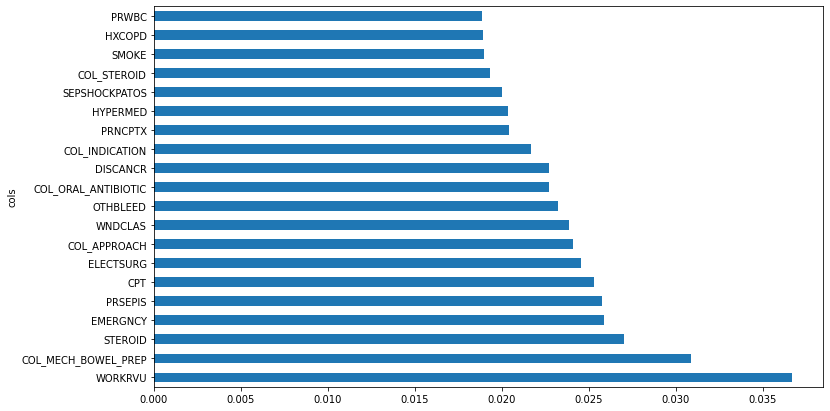

In [ ]:
fi2 = rf_feat_importance(model2, X)
fi2[:10]

plot_fi(fi2[:20]);

In [46]:
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train, y_train)
evaluate(model3, X_valid, y_valid)

AUC 0.7250312166895081


/home/kchen/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
cv_score(model2, X, y)

array([0.70473436, 0.773925  , 0.76685792, 0.73540259, 0.7563074 ,
       0.6965257 , 0.73512059, 0.81812649, 0.78115983, 0.77432073])

In [48]:
model3 = LogisticRegression(max_iter=2000)

In [49]:
cv_score(model3, X, y)

array([0.65807985, 0.73363332, 0.71209909, 0.70993031, 0.71592917,
       0.67035924, 0.7161383 , 0.77847773, 0.75809148, 0.74481932])

In [50]:
import scipy.stats as st

In [51]:
scores1 = cv_score(model, X, y)
st.t.interval(alpha=0.95, df=len(scores1)-1, loc=np.mean(scores1), scale=st.sem(scores1)) 

(0.7235483532164889, 0.772963094982806)

In [35]:
scores1 = [0.71531135, 0.74038995, 0.71404602, 0.7642199,  0.77769283]

In [ ]:
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

In [42]:
scores2 = [0.72648202, 0.75066067, 0.72146251, 0.77163038, 0.78120409]
st.t.interval(alpha=0.95, df=len(scores2)-1, loc=np.mean(scores2), scale=st.sem(scores2)) 

(0.7173834032024041, 0.7831924647975957)

In [39]:
scores3 = [0.70270422, 0.71082232, 0.69507798, 0.74388536, 0.71401948]

In [40]:
st.t.interval(alpha=0.95, df=len(scores3)-1, loc=np.mean(scores3), scale=st.sem(scores3)) 

(0.6901852915520781, 0.736418452447922)

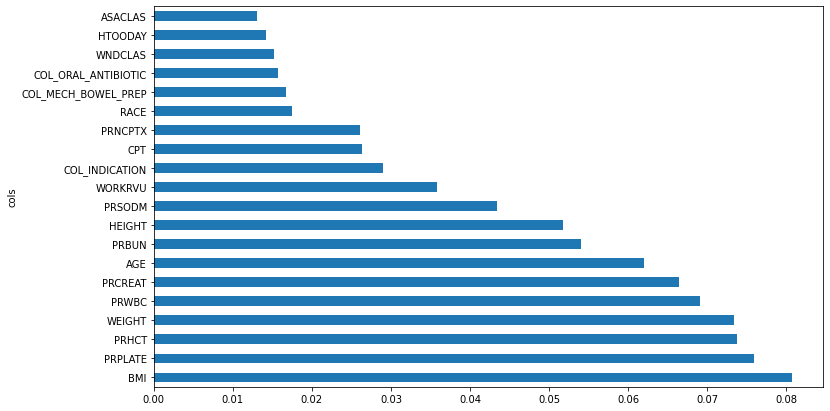

In [ ]:
def rf_feat_importance(model, X):
    return pd.DataFrame({'cols':X.columns, 'imp':model.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(model, X)
fi[:10]
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:20]);

In [9]:
evaluate(model3, X_test, y_test)

NameError: name 'evaluate' is not defined

In [ ]:
cross_val_score(model, X, y, scoring='roc_auc_score')

In [15]:
rf_preds = (model.predict_proba(X_test))[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_preds)
%store rf_fpr
%store rf_tpr

Stored 'rf_fpr' (ndarray)
Stored 'rf_tpr' (ndarray)


In [16]:
xgb_preds = (model2.predict_proba(X_test))[:,1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_preds)
%store xgb_fpr
%store xgb_tpr

Stored 'xgb_fpr' (ndarray)
Stored 'xgb_tpr' (ndarray)


In [17]:
def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, AUC, upper)

In [18]:
roc_auc_ci(y_test, rf_preds)

(0.725050986733118, 0.759821884704613, 0.794592782676108)

In [19]:
roc_auc_ci(y_test, xgb_preds)

(0.7416098371992612, 0.7757550977316873, 0.8099003582641133)

In [20]:
def acc(model1, X, y):
    preds = model1.predict(X)
    pscore = accuracy_score(y, preds)
    print('acc', pscore)
acc(model2, X_test, y_test)

acc 0.9942810615900587


In [21]:
def recall(model1, X, y):
    preds = model1.predict(X)
    pscore = recall_score(y, preds)
    print('sensitivity', pscore)
recall(model2, X_test, y_test)

sensitivity 0.0


In [22]:
y_test.value_counts(normalize=True)

0    0.994281
1    0.005719
Name: URETER, dtype: float64

In [23]:
xgbpreds = model2.predict_proba(X_test)
xgbpreds10 = xgbpreds[:,1]

In [24]:
dfpreds = pd.DataFrame(xgbpreds10)

In [25]:
dfpreds.describe()

,0
count,51583.000000
mean,0.005573
std,0.007377
min,0.000280
25%,0.001958
50%,0.003513
75%,0.006501
max,0.193877


In [26]:
xgbpreds10[xgbpreds10 >= 0.006] = 1
xgbpreds10[xgbpreds10 < 0.006] = 0
tn, fp, fn, tp = confusion_matrix(y_test, xgbpreds10).ravel()
(tn, fp, fn, tp)

(37290, 13998, 84, 211)

In [27]:
print("sensitivity = ")
print(tp / (tp + fn))
print("specificity = ")
print(tn / (tn + fp))
print('accuracy = ')
accuracy_score(y_test, xgbpreds10)

sensitivity = 
0.7152542372881356
specificity = 
0.7270706598034627
accuracy = 


0.7270030824108717

y1 = data['READMPODAYS1']
X1 = data.drop(['READMISSION1', 'READMPODAYS1'], axis=1)